# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=2000)
lngs = np.random.uniform(low=-180.000, high=180.000, size=2000)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

764

In [3]:
city_df = pd.DataFrame({"City":cities})
city_df["Lat"] = ""
city_df["Temp"] = ""
city_df["Humidity"] = ""
city_df["Cloud"] = ""
city_df["Wind"] = ""
city_df.head()


,City,Lat,Temp,Humidity,Cloud,Wind
0,rikitea,,,,,
1,port-gentil,,,,,
2,kodiak,,,,,
3,lorengau,,,,,
4,yellowknife,,,,,


In [4]:
#create empty columns for other features temp, humidity etc....

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:

params = {"key": api_key}
for index, row in city_df.iterrows():
    city_name = row["City"]
    base_url = f"http://api.openweathermap.org/data/2.5/weather?q={city_name}&units=imperial&APPID="+api_key
    try:
        response = requests.get(base_url)
        response = response.json()
        print(response)
    
    
        city_df.loc[index, "Lat"] = response["coord"]["lat"]
        city_df.loc[index, "Temp"] = response["main"]["temp"]
        city_df.loc[index, "Humidity"] = response["main"]["humidity"]
        city_df.loc[index, "Cloud"] = response["clouds"]["all"]
        city_df.loc[index, "Wind"] = response["wind"]["speed"]
   
    except:
        pass
city_df = city_df.dropna(how='any')
city_df.count()


{'coord': {'lon': -134.97, 'lat': -23.12}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 75.26, 'pressure': 1031.3, 'humidity': 95, 'temp_min': 75.26, 'temp_max': 75.26, 'sea_level': 1031.36, 'grnd_level': 1031.3}, 'wind': {'speed': 21.43, 'deg': 62.5001}, 'clouds': {'all': 44}, 'dt': 1541290082, 'sys': {'message': 0.037, 'country': 'PF', 'sunrise': 1541340748, 'sunset': 1541387679}, 'id': 4030556, 'name': 'Rikitea', 'cod': 200}
{'coord': {'lon': 8.78, 'lat': -0.72}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 80.6, 'pressure': 1011, 'humidity': 83, 'temp_min': 80.6, 'temp_max': 80.6}, 'visibility': 10000, 'wind': {'speed': 11.41, 'deg': 190}, 'clouds': {'all': 75}, 'dt': 1541286000, 'sys': {'type': 1, 'id': 6834, 'message': 0.0032, 'country': 'GA', 'sunrise': 1541307849, 'sunset': 1541351560}, 'id': 2396518, 'name': 'P

{'coord': {'lon': 15.63, 'lat': 78.22}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 28.4, 'pressure': 1009, 'humidity': 68, 'temp_min': 28.4, 'temp_max': 28.4}, 'visibility': 10000, 'wind': {'speed': 29.97, 'deg': 130}, 'clouds': {'all': 20}, 'dt': 1541289000, 'sys': {'type': 1, 'id': 5326, 'message': 0.0043, 'country': 'NO', 'sunrise': 0, 'sunset': 0}, 'id': 2729907, 'name': 'Longyearbyen', 'cod': 200}
{'coord': {'lon': 23.04, 'lat': 69.01}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 12.66, 'pressure': 970.82, 'humidity': 75, 'temp_min': 12.66, 'temp_max': 12.66, 'sea_level': 1027.75, 'grnd_level': 970.82}, 'wind': {'speed': 2.53, 'deg': 175}, 'clouds': {'all': 12}, 'dt': 1541290087, 'sys': {'message': 0.0039, 'country': 'NO', 'sunrise': 1541314864, 'sunset': 1541337625}, 'id': 779330, 'name': 'Kautokeino', 'cod': 200}
{'cod

{'coord': {'lon': -108.16, 'lat': 25.37}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 84.93, 'pressure': 1015.33, 'humidity': 47, 'temp_min': 84.93, 'temp_max': 84.93, 'sea_level': 1023.37, 'grnd_level': 1015.33}, 'wind': {'speed': 5.1, 'deg': 276.5}, 'clouds': {'all': 0}, 'dt': 1541290091, 'sys': {'message': 0.0534, 'country': 'MX', 'sunrise': 1541337747, 'sunset': 1541377776}, 'id': 4018499, 'name': 'Angostura', 'cod': 200}
{'coord': {'lon': 18.42, 'lat': -33.93}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 60.8, 'pressure': 1007, 'humidity': 93, 'temp_min': 60.8, 'temp_max': 60.8}, 'visibility': 8000, 'wind': {'speed': 16.11, 'deg': 330}, 'clouds': {'all': 75}, 'dt': 1541286000, 'sys': {'type': 1, 'id': 6529, 'message': 0.0044, 'country': 'ZA', 'sunrise': 1541302984, 'sunset': 1541351827}, 'id': 3369157, 'name': 'Cape Town

{'coord': {'lon': 102.47, 'lat': 71.98}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 4.83, 'pressure': 1010.38, 'humidity': 85, 'temp_min': 4.83, 'temp_max': 4.83, 'sea_level': 1015.35, 'grnd_level': 1010.38}, 'wind': {'speed': 12.82, 'deg': 222.5}, 'clouds': {'all': 76}, 'dt': 1541290097, 'sys': {'message': 0.0065, 'country': 'RU', 'sunrise': 1541298215, 'sunset': 1541316138}, 'id': 2022572, 'name': 'Khatanga', 'cod': 200}
{'coord': {'lon': -68.52, 'lat': 63.75}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 15.8, 'pressure': 1019, 'humidity': 72, 'temp_min': 15.8, 'temp_max': 15.8}, 'visibility': 24140, 'wind': {'speed': 10.29, 'deg': 340}, 'clouds': {'all': 90}, 'dt': 1541286000, 'sys': {'type': 1, 'id': 3590, 'message': 0.028, 'country': 'CA', 'sunrise': 1541334275, 'sunset': 1541362176}, 'id': 5983720, 'name': 'Iqaluit', '

{'coord': {'lon': 50.81, 'lat': 25.21}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 72.42, 'pressure': 1024.32, 'humidity': 71, 'temp_min': 72.42, 'temp_max': 72.42, 'sea_level': 1027.99, 'grnd_level': 1024.32}, 'wind': {'speed': 5.1, 'deg': 90.0001}, 'clouds': {'all': 8}, 'dt': 1541290103, 'sys': {'message': 0.0035, 'country': 'QA', 'sunrise': 1541299564, 'sunset': 1541339652}, 'id': 289548, 'name': 'Umm Bab', 'cod': 200}
{'coord': {'lon': -72.9, 'lat': -13.74}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 44.39, 'pressure': 670.41, 'humidity': 98, 'temp_min': 44.39, 'temp_max': 44.39, 'sea_level': 1020.9, 'grnd_level': 670.41}, 'wind': {'speed': 2.26, 'deg': 190}, 'rain': {'3h': 4.405}, 'clouds': {'all': 80}, 'dt': 1541290103, 'sys': {'message': 0.003, 'country': 'PE', 'sunrise': 1541326565, 'sunset': 1541372060}, 'id': 394864

{'coord': {'lon': -73.76, 'lat': -42.48}, 'weather': [{'id': 502, 'main': 'Rain', 'description': 'heavy intensity rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 52.13, 'pressure': 999.6, 'humidity': 98, 'temp_min': 52.13, 'temp_max': 52.13, 'sea_level': 1014.17, 'grnd_level': 999.6}, 'wind': {'speed': 13.67, 'deg': 316.5}, 'rain': {'3h': 12.21}, 'clouds': {'all': 92}, 'dt': 1541290108, 'sys': {'message': 0.0033, 'country': 'CL', 'sunrise': 1541324114, 'sunset': 1541374958}, 'id': 3896218, 'name': 'Castro', 'cod': 200}
{'coord': {'lon': -63.75, 'lat': -35.66}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 69.9, 'pressure': 1011.52, 'humidity': 52, 'temp_min': 69.9, 'temp_max': 69.9, 'sea_level': 1024.67, 'grnd_level': 1011.52}, 'wind': {'speed': 9.86, 'deg': 56.5001}, 'clouds': {'all': 0}, 'dt': 1541290108, 'sys': {'message': 0.0048, 'country': 'AR', 'sunrise': 1541322514, 'sunset': 1541371742}, '

{'coord': {'lon': 15.06, 'lat': -7.61}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 66.89, 'pressure': 924.13, 'humidity': 90, 'temp_min': 66.89, 'temp_max': 66.89, 'sea_level': 1023.78, 'grnd_level': 924.13}, 'wind': {'speed': 2.08, 'deg': 245.5}, 'clouds': {'all': 56}, 'dt': 1541290112, 'sys': {'message': 0.0027, 'country': 'AO', 'sunrise': 1541305883, 'sunset': 1541350516}, 'id': 2236568, 'name': 'Uige', 'cod': 200}
{'coord': {'lon': -58.62, 'lat': 6.41}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 78.8, 'pressure': 1010, 'humidity': 94, 'temp_min': 78.8, 'temp_max': 78.8}, 'visibility': 10000, 'wind': {'speed': 6.93, 'deg': 20}, 'clouds': {'all': 40}, 'dt': 1541286000, 'sys': {'type': 1, 'id': 4343, 'message': 0.0039, 'country': 'GY', 'sunrise': 1541324497, 'sunset': 1541367259}, 'id': 3379507, 'name': 'Bartica', 

{'coord': {'lon': 153.24, 'lat': -28.95}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 84.93, 'pressure': 1000.65, 'humidity': 62, 'temp_min': 84.93, 'temp_max': 84.93, 'sea_level': 1026.37, 'grnd_level': 1000.65}, 'wind': {'speed': 5.39, 'deg': 281}, 'clouds': {'all': 0}, 'dt': 1541290117, 'sys': {'message': 0.0043, 'country': 'AU', 'sunrise': 1541271116, 'sunset': 1541318975}, 'id': 2160063, 'name': 'Codrington', 'cod': 200}
{'coord': {'lon': 39.83, 'lat': 21.43}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 67.74, 'pressure': 996.68, 'humidity': 61, 'temp_min': 67.74, 'temp_max': 67.74, 'sea_level': 1023.9, 'grnd_level': 996.68}, 'wind': {'speed': 3.31, 'deg': 152.5}, 'clouds': {'all': 24}, 'dt': 1541289906, 'sys': {'message': 0.0032, 'country': 'SA', 'sunrise': 1541301910, 'sunset': 1541342579}, 'id': 104515, 'name': 'Mecca', 

{'coord': {'lon': 140.83, 'lat': 35.73}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 55.02, 'pressure': 1024, 'humidity': 82, 'temp_min': 53.6, 'temp_max': 57.2}, 'visibility': 10000, 'wind': {'speed': 5.82, 'deg': 330}, 'clouds': {'all': 75}, 'dt': 1541287800, 'sys': {'type': 1, 'id': 7505, 'message': 0.0055, 'country': 'JP', 'sunrise': 1541278866, 'sunset': 1541317132}, 'id': 2112802, 'name': 'Hasaki', 'cod': 200}
{'coord': {'lon': 38.73, 'lat': 8.96}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 60.8, 'pressure': 1025, 'humidity': 55, 'temp_min': 60.8, 'temp_max': 60.8}, 'visibility': 10000, 'wind': {'speed': 6.93, 'deg': 100}, 'clouds': {'all': 75}, 'dt': 1541286000, 'sys': {'type': 1, 'id': 6338, 'message': 0.0033, 'country': 'ET', 'sunrise': 1541301300, 'sunset': 1541343726}, 'id': 344979, 'name': 'Lebu', 'cod': 200

{'coord': {'lon': 168.86, 'lat': -46.19}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 48.57, 'pressure': 991.01, 'humidity': 87, 'temp_min': 48.57, 'temp_max': 48.57, 'sea_level': 1005.86, 'grnd_level': 991.01}, 'wind': {'speed': 24.96, 'deg': 266.5}, 'rain': {'3h': 2.43}, 'clouds': {'all': 92}, 'dt': 1541290128, 'sys': {'message': 0.0076, 'country': 'NZ', 'sunrise': 1541265423, 'sunset': 1541317199}, 'id': 6201424, 'name': 'Mataura', 'cod': 200}
{'cod': '404', 'message': 'city not found'}
{'coord': {'lon': 32.9, 'lat': 24.09}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 59.24, 'pressure': 998.3, 'humidity': 95, 'temp_min': 59.24, 'temp_max': 59.24, 'sea_level': 1024.95, 'grnd_level': 998.3}, 'wind': {'speed': 2.19, 'deg': 322}, 'clouds': {'all': 0}, 'dt': 1541289921, 'sys': {'message': 0.0033, 'country': 'EG', 'sunrise': 15413037

{'coord': {'lon': -8.86, 'lat': 41.72}, 'weather': [{'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 54.61, 'pressure': 1019, 'humidity': 87, 'temp_min': 53.6, 'temp_max': 55.4}, 'visibility': 9000, 'wind': {'speed': 6.93, 'deg': 200}, 'clouds': {'all': 90}, 'dt': 1541289600, 'sys': {'type': 1, 'id': 5507, 'message': 0.0062, 'country': 'PT', 'sunrise': 1541315458, 'sunset': 1541352386}, 'id': 2742765, 'name': 'Areosa', 'cod': 200}
{'coord': {'lon': -173.23, 'lat': 64.42}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 35.39, 'pressure': 1006.98, 'humidity': 100, 'temp_min': 35.39, 'temp_max': 35.39, 'sea_level': 1013.2, 'grnd_level': 1006.98}, 'wind': {'speed': 5.73, 'deg': 73.0001}, 'clouds': {'all': 44}, 'dt': 1541290133, 'sys': {'message': 0.0132, 'country': 'RU', 'sunrise': 1541359726, 'sunset': 1541386986}, 'id': 4031574, 'name': 'Provideniya'

{'coord': {'lon': -0.19, 'lat': 54.08}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 48.85, 'pressure': 1010, 'humidity': 81, 'temp_min': 46.4, 'temp_max': 51.8}, 'visibility': 10000, 'wind': {'speed': 10.29, 'deg': 160}, 'clouds': {'all': 12}, 'dt': 1541289000, 'sys': {'type': 1, 'id': 5181, 'message': 0.0037, 'country': 'GB', 'sunrise': 1541315231, 'sunset': 1541348437}, 'id': 2654728, 'name': 'Bridlington', 'cod': 200}
{'coord': {'lon': -67.94, 'lat': -3.1}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 80.61, 'pressure': 1011.52, 'humidity': 87, 'temp_min': 80.61, 'temp_max': 80.61, 'sea_level': 1019.32, 'grnd_level': 1011.52}, 'wind': {'speed': 2.48, 'deg': 32.5001}, 'rain': {'3h': 0.13}, 'clouds': {'all': 20}, 'dt': 1541290138, 'sys': {'message': 0.0312, 'country': 'BR', 'sunrise': 1541326103, 'sunset': 1541370133}, 'id': 366

{'coord': {'lon': 86.03, 'lat': 44.3}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 21.57, 'pressure': 989.06, 'humidity': 80, 'temp_min': 21.57, 'temp_max': 21.57, 'sea_level': 1052.55, 'grnd_level': 989.06}, 'wind': {'speed': 2.37, 'deg': 158.5}, 'clouds': {'all': 56}, 'dt': 1541290142, 'sys': {'message': 0.0031, 'country': 'CN', 'sunrise': 1541292980, 'sunset': 1541329314}, 'id': 1529195, 'name': 'Shihezi', 'cod': 200}
{'coord': {'lon': 135.55, 'lat': 70}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': -23.75, 'pressure': 999.6, 'humidity': 35, 'temp_min': -23.75, 'temp_max': -23.75, 'sea_level': 1029.45, 'grnd_level': 999.6}, 'wind': {'speed': 2.86, 'deg': 165}, 'clouds': {'all': 32}, 'dt': 1541290142, 'sys': {'message': 0.0036, 'country': 'RU', 'sunrise': 1541288470, 'sunset': 1541310011}, 'id': 2013921, 'name': 'Ust

{'coord': {'lon': 4.24, 'lat': 48.95}, 'weather': [{'id': 741, 'main': 'Fog', 'description': 'fog', 'icon': '50n'}, {'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 35.6, 'pressure': 1020, 'humidity': 93, 'temp_min': 35.6, 'temp_max': 35.6}, 'visibility': 600, 'wind': {'speed': 8.05, 'deg': 70}, 'clouds': {'all': 40}, 'dt': 1541287800, 'sys': {'type': 1, 'id': 5604, 'message': 0.0041, 'country': 'FR', 'sunrise': 1541313278, 'sunset': 1541348270}, 'id': 2995603, 'name': 'Saint-Pierre', 'cod': 200}
{'coord': {'lon': -35.22, 'lat': -9.01}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 77.19, 'pressure': 1017.76, 'humidity': 84, 'temp_min': 77.19, 'temp_max': 77.19, 'sea_level': 1026.37, 'grnd_level': 1017.76}, 'wind': {'speed': 7.23, 'deg': 97.5001}, 'clouds': {'all': 76}, 'dt': 1541290147, 'sys': {'message': 0.0376, 'country': 'BR', 'sunrise': 15413178

{'coord': {'lon': 122.99, 'lat': 10.2}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 80.7, 'pressure': 1001.14, 'humidity': 84, 'temp_min': 80.7, 'temp_max': 80.7, 'sea_level': 1024.43, 'grnd_level': 1001.14}, 'wind': {'speed': 3.49, 'deg': 87.5001}, 'clouds': {'all': 32}, 'dt': 1541290151, 'sys': {'message': 0.0034, 'country': 'PH', 'sunrise': 1541281157, 'sunset': 1541323422}, 'id': 1710518, 'name': 'Isabela', 'cod': 200}
{'coord': {'lon': 63.05, 'lat': 26}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 65.49, 'pressure': 1010.22, 'humidity': 14, 'temp_min': 65.49, 'temp_max': 65.49, 'sea_level': 1029.74, 'grnd_level': 1010.22}, 'wind': {'speed': 21.21, 'deg': 26.5001}, 'clouds': {'all': 44}, 'dt': 1541290151, 'sys': {'message': 0.0032, 'country': 'PK', 'sunrise': 1541296688, 'sunset': 1541336652}, 'id': 1163054, 'n

{'coord': {'lon': 137.58, 'lat': -33.04}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 73.4, 'pressure': 1013, 'humidity': 46, 'temp_min': 73.4, 'temp_max': 73.4}, 'visibility': 10000, 'wind': {'speed': 6.93, 'deg': 20}, 'clouds': {'all': 56}, 'dt': 1541286000, 'sys': {'type': 1, 'id': 8241, 'message': 0.0035, 'country': 'AU', 'sunrise': 1541274492, 'sunset': 1541323121}, 'id': 2058430, 'name': 'Whyalla', 'cod': 200}
{'cod': '404', 'message': 'city not found'}
{'coord': {'lon': 7.39, 'lat': 18.74}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 65.22, 'pressure': 971.96, 'humidity': 29, 'temp_min': 65.22, 'temp_max': 65.22, 'sea_level': 1024.43, 'grnd_level': 971.96}, 'wind': {'speed': 2.82, 'deg': 280.5}, 'clouds': {'all': 0}, 'dt': 1541290155, 'sys': {'message': 0.0035, 'country': 'NE', 'sunrise': 1541309501, 'sunset': 15413505

{'coord': {'lon': -2.6, 'lat': 51.45}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 52.93, 'pressure': 1012, 'humidity': 100, 'temp_min': 51.08, 'temp_max': 55.4}, 'visibility': 10000, 'wind': {'speed': 13.87, 'deg': 170}, 'clouds': {'all': 90}, 'dt': 1541289360, 'sys': {'type': 1, 'id': 5076, 'message': 0.0047, 'country': 'GB', 'sunrise': 1541315328, 'sunset': 1541349501}, 'id': 2654675, 'name': 'Bristol', 'cod': 200}
{'coord': {'lon': 152.85, 'lat': -25.3}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 77.82, 'pressure': 1028.62, 'humidity': 85, 'temp_min': 77.82, 'temp_max': 77.82, 'sea_level': 1029.9, 'grnd_level': 1028.62}, 'wind': {'speed': 11.77, 'deg': 330.5}, 'clouds': {'all': 0}, 'dt': 1541290162, 'sys': {'message': 0.1129, 'country': 'AU', 'sunrise': 1541271522, 'sunset': 1541318753}, 'id': 2146219, 'name': 'Hervey Bay', '

{'coord': {'lon': -60.77, 'lat': -19.93}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 86.64, 'pressure': 995.95, 'humidity': 59, 'temp_min': 86.64, 'temp_max': 86.64, 'sea_level': 1016.4, 'grnd_level': 995.95}, 'wind': {'speed': 11.36, 'deg': 339}, 'clouds': {'all': 88}, 'dt': 1541290166, 'sys': {'message': 0.0031, 'country': 'PY', 'sunrise': 1541323198, 'sunset': 1541369610}, 'id': 3867427, 'name': 'Mayor Pablo Lagerenza', 'cod': 200}
{'coord': {'lon': 12.92, 'lat': 18.69}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 59.78, 'pressure': 967.42, 'humidity': 27, 'temp_min': 59.78, 'temp_max': 59.78, 'sea_level': 1025.56, 'grnd_level': 967.42}, 'wind': {'speed': 2.82, 'deg': 81.5001}, 'clouds': {'all': 0}, 'dt': 1541290166, 'sys': {'message': 0.0029, 'country': 'NE', 'sunrise': 1541308169, 'sunset': 1541349238}, 'id': 2446796,

{'coord': {'lon': -52.33, 'lat': 4.85}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 80.6, 'pressure': 1010, 'humidity': 78, 'temp_min': 80.6, 'temp_max': 80.6}, 'visibility': 10000, 'wind': {'speed': 1.12}, 'clouds': {'all': 0}, 'dt': 1541287800, 'sys': {'type': 1, 'id': 4338, 'message': 0.0416, 'country': 'GF', 'sunrise': 1541322884, 'sunset': 1541365854}, 'id': 3380965, 'name': 'Matoury', 'cod': 200}
{'coord': {'lon': -67.49, 'lat': 6.19}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 86, 'pressure': 1007, 'humidity': 70, 'temp_min': 86, 'temp_max': 86}, 'visibility': 10000, 'wind': {'speed': 2.04, 'deg': 73.5001}, 'clouds': {'all': 20}, 'dt': 1541286000, 'sys': {'type': 1, 'id': 4267, 'message': 0.0036, 'country': 'CO', 'sunrise': 1541326611, 'sunset': 1541369402}, 'id': 3671519, 'name': 'Puerto Carreno', 'cod': 200}
{'coord': 

{'coord': {'lon': -70.73, 'lat': -32.75}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 68, 'pressure': 1017, 'humidity': 45, 'temp_min': 68, 'temp_max': 68}, 'visibility': 10000, 'wind': {'speed': 11.41, 'deg': 210}, 'clouds': {'all': 0}, 'dt': 1541286000, 'sys': {'type': 1, 'id': 4645, 'message': 0.0797, 'country': 'CL', 'sunrise': 1541324484, 'sunset': 1541373118}, 'id': 3872255, 'name': 'San Felipe', 'cod': 200}
{'cod': '404', 'message': 'city not found'}
{'coord': {'lon': -6.59, 'lat': 62.23}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 48.2, 'pressure': 986, 'humidity': 87, 'temp_min': 48.2, 'temp_max': 48.2}, 'wind': {'speed': 23.04, 'deg': 150}, 'clouds': {'all': 92}, 'dt': 1541289000, 'sys': {'type': 1, 'id': 5266, 'message': 0.003, 'country': 'FO', 'sunrise': 1541318841, 'sunset': 1541347887}, 'id': 2618795, 'name': 'Klaks

{'coord': {'lon': -95.96, 'lat': 33.31}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 67.53, 'pressure': 1011, 'humidity': 52, 'temp_min': 62.96, 'temp_max': 69.8}, 'visibility': 16093, 'wind': {'speed': 9.17, 'deg': 160}, 'clouds': {'all': 75}, 'dt': 1541289360, 'sys': {'type': 1, 'id': 2626, 'message': 0.0039, 'country': 'US', 'sunrise': 1541335501, 'sunset': 1541374159}, 'id': 4682762, 'name': 'Fairlie', 'cod': 200}
{'coord': {'lon': 135.5, 'lat': -3.36}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 75.84, 'pressure': 948.45, 'humidity': 86, 'temp_min': 75.84, 'temp_max': 75.84, 'sea_level': 1023.82, 'grnd_level': 948.45}, 'wind': {'speed': 2.19, 'deg': 333}, 'rain': {'3h': 0.215}, 'clouds': {'all': 44}, 'dt': 1541290182, 'sys': {'message': 0.0037, 'country': 'ID', 'sunrise': 1541277263, 'sunset': 1541321321}, 'id': 1634614,

{'coord': {'lon': 39.91, 'lat': -16.23}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 77.37, 'pressure': 1027.73, 'humidity': 100, 'temp_min': 77.37, 'temp_max': 77.37, 'sea_level': 1027.95, 'grnd_level': 1027.73}, 'wind': {'speed': 17.85, 'deg': 192}, 'clouds': {'all': 92}, 'dt': 1541290186, 'sys': {'message': 0.0035, 'country': 'MZ', 'sunrise': 1541299318, 'sunset': 1541345160}, 'id': 1052944, 'name': 'Angoche', 'cod': 200}
{'coord': {'lon': 10.08, 'lat': 7.32}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 72.06, 'pressure': 986.06, 'humidity': 86, 'temp_min': 72.06, 'temp_max': 72.06, 'sea_level': 1023.49, 'grnd_level': 986.06}, 'wind': {'speed': 3.53, 'deg': 143.5}, 'clouds': {'all': 76}, 'dt': 1541290186, 'sys': {'message': 0.0039, 'country': 'NG', 'sunrise': 1541308068, 'sunset': 1541350711}, 'id': 2322552, 'name':

{'cod': '404', 'message': 'city not found'}
{'coord': {'lon': -25.67, 'lat': 37.73}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 64.4, 'pressure': 1025, 'humidity': 77, 'temp_min': 64.4, 'temp_max': 64.4}, 'visibility': 10000, 'wind': {'speed': 4.7, 'deg': 20}, 'clouds': {'all': 20}, 'dt': 1541287800, 'sys': {'type': 1, 'id': 5957, 'message': 0.049, 'country': 'PT', 'sunrise': 1541319055, 'sunset': 1541356861}, 'id': 3372783, 'name': 'Ponta Delgada', 'cod': 200}
{'coord': {'lon': 40.69, 'lat': -14.56}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 77.06, 'pressure': 1025.3, 'humidity': 93, 'temp_min': 77.06, 'temp_max': 77.06, 'sea_level': 1027.26, 'grnd_level': 1025.3}, 'wind': {'speed': 12.59, 'deg': 198}, 'clouds': {'all': 36}, 'dt': 1541290193, 'sys': {'message': 0.0034, 'country': 'MZ', 'sunrise': 1541299251, 'sunset'

{'coord': {'lon': 62.33, 'lat': 25.12}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 69.63, 'pressure': 1024.97, 'humidity': 71, 'temp_min': 69.63, 'temp_max': 69.63, 'sea_level': 1029.01, 'grnd_level': 1024.97}, 'wind': {'speed': 21.94, 'deg': 25.0001}, 'clouds': {'all': 20}, 'dt': 1541290197, 'sys': {'message': 0.0032, 'country': 'PK', 'sunrise': 1541296791, 'sunset': 1541336895}, 'id': 1177446, 'name': 'Gwadar', 'cod': 200}
{'cod': '404', 'message': 'city not found'}
{'coord': {'lon': -79.01, 'lat': -8.17}, 'weather': [{'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50d'}], 'base': 'stations', 'main': {'temp': 66.2, 'pressure': 1013, 'humidity': 88, 'temp_min': 66.2, 'temp_max': 66.2}, 'visibility': 8000, 'wind': {'speed': 10.29, 'deg': 140}, 'clouds': {'all': 20}, 'dt': 1541286000, 'sys': {'type': 1, 'id': 4404, 'message': 0.0037, 'country': 'PE', 'sunrise': 1541328419, 'sunset': 1541373135}

{'cod': '404', 'message': 'city not found'}
{'coord': {'lon': -87.06, 'lat': 41.47}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 47.1, 'pressure': 1023, 'humidity': 61, 'temp_min': 46.04, 'temp_max': 48.2}, 'visibility': 16093, 'wind': {'speed': 10.29, 'deg': 70}, 'clouds': {'all': 90}, 'dt': 1541288700, 'sys': {'type': 1, 'id': 1030, 'message': 0.0042, 'country': 'US', 'sunrise': 1541334213, 'sunset': 1541371168}, 'id': 4927537, 'name': 'Valparaiso', 'cod': 200}
{'cod': '404', 'message': 'city not found'}
{'coord': {'lon': 77.06, 'lat': 31.67}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 41.82, 'pressure': 876.47, 'humidity': 93, 'temp_min': 41.82, 'temp_max': 41.82, 'sea_level': 1030.79, 'grnd_level': 876.47}, 'wind': {'speed': 1.86, 'deg': 358.5}, 'rain': {'3h': 1.995}, 'clouds': {'all': 92}, 'dt': 1541290211, 'sys': {'m

{'coord': {'lon': -56.08, 'lat': -9.87}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 75.3, 'pressure': 995.71, 'humidity': 97, 'temp_min': 75.3, 'temp_max': 75.3, 'sea_level': 1021.35, 'grnd_level': 995.71}, 'wind': {'speed': 1.97, 'deg': 308}, 'clouds': {'all': 0}, 'dt': 1541290215, 'sys': {'message': 0.0224, 'country': 'BR', 'sunrise': 1541322800, 'sunset': 1541367748}, 'id': 6316343, 'name': 'Alta Floresta', 'cod': 200}
{'coord': {'lon': 11.22, 'lat': 64.07}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 46.4, 'pressure': 1010, 'humidity': 81, 'temp_min': 46.4, 'temp_max': 46.4}, 'visibility': 10000, 'wind': {'speed': 12.75, 'deg': 140}, 'clouds': {'all': 75}, 'dt': 1541289000, 'sys': {'type': 1, 'id': 5341, 'message': 0.0035, 'country': 'NO', 'sunrise': 1541315218, 'sunset': 1541342956}, 'id': 3146508, 'name': 'Malm', 'cod': 200

{'coord': {'lon': 56.15, 'lat': 58.79}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 34.08, 'pressure': 1011.03, 'humidity': 97, 'temp_min': 34.08, 'temp_max': 34.08, 'sea_level': 1029.05, 'grnd_level': 1011.03}, 'wind': {'speed': 14.67, 'deg': 216}, 'rain': {'3h': 1.09}, 'clouds': {'all': 92}, 'dt': 1541290221, 'sys': {'message': 0.0425, 'country': 'RU', 'sunrise': 1541302748, 'sunset': 1541333870}, 'id': 569122, 'name': 'Chermoz', 'cod': 200}
{'coord': {'lon': 112.95, 'lat': -2.54}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 76.43, 'pressure': 1015.81, 'humidity': 97, 'temp_min': 76.43, 'temp_max': 76.43, 'sea_level': 1024.75, 'grnd_level': 1015.81}, 'wind': {'speed': 5.32, 'deg': 327.5}, 'clouds': {'all': 20}, 'dt': 1541290221, 'sys': {'message': 0.004, 'country': 'ID', 'sunrise': 1541282729, 'sunset': 1541326679}, 'id': 1628

{'coord': {'lon': -99.26, 'lat': 16.99}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 84.2, 'pressure': 1009, 'humidity': 79, 'temp_min': 84.2, 'temp_max': 84.2}, 'visibility': 11265, 'wind': {'speed': 6.93, 'deg': 260}, 'clouds': {'all': 40}, 'dt': 1541285100, 'sys': {'type': 1, 'id': 3965, 'message': 0.0106, 'country': 'MX', 'sunrise': 1541334978, 'sunset': 1541376278}, 'id': 3532499, 'name': 'Tecoanapa', 'cod': 200}
{'coord': {'lon': 13.24, 'lat': -8.83}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 77, 'pressure': 1011, 'humidity': 83, 'temp_min': 77, 'temp_max': 77}, 'visibility': 10000, 'wind': {'speed': 4.7, 'deg': 180}, 'clouds': {'all': 75}, 'dt': 1541286000, 'sys': {'type': 1, 'id': 6821, 'message': 0.0114, 'country': 'AO', 'sunrise': 1541306237, 'sunset': 1541351037}, 'id': 2240449, 'name': 'Luanda', 'cod': 2

{'coord': {'lon': -110.32, 'lat': 24.15}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 84.2, 'pressure': 1011, 'humidity': 28, 'temp_min': 84.2, 'temp_max': 84.2}, 'visibility': 16093, 'wind': {'speed': 11.41, 'deg': 340}, 'clouds': {'all': 5}, 'dt': 1541284800, 'sys': {'type': 1, 'id': 3990, 'message': 0.0028, 'country': 'MX', 'sunrise': 1541338169, 'sunset': 1541378391}, 'id': 4000900, 'name': 'La Paz', 'cod': 200}
{'coord': {'lon': -81.27, 'lat': -4.58}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 72.78, 'pressure': 1010.14, 'humidity': 71, 'temp_min': 72.78, 'temp_max': 72.78, 'sea_level': 1025.07, 'grnd_level': 1010.14}, 'wind': {'speed': 11.25, 'deg': 196}, 'clouds': {'all': 32}, 'dt': 1541290231, 'sys': {'message': 0.0032, 'country': 'PE', 'sunrise': 1541329204, 'sunset': 1541373432}, 'id': 3691582, 'name': 'Talara',

{'coord': {'lon': 60.65, 'lat': 25.29}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 72.96, 'pressure': 1028.38, 'humidity': 100, 'temp_min': 72.96, 'temp_max': 72.96, 'sea_level': 1029.53, 'grnd_level': 1028.38}, 'wind': {'speed': 20.04, 'deg': 58.5001}, 'clouds': {'all': 36}, 'dt': 1541290236, 'sys': {'message': 0.0031, 'country': 'IR', 'sunrise': 1541297208, 'sunset': 1541337285}, 'id': 1161724, 'name': 'Chabahar', 'cod': 200}
{'coord': {'lon': 75.81, 'lat': 41.17}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 6.09, 'pressure': 774.41, 'humidity': 74, 'temp_min': 6.09, 'temp_max': 6.09, 'sea_level': 1052.47, 'grnd_level': 774.41}, 'wind': {'speed': 1.3, 'deg': 244}, 'clouds': {'all': 36}, 'dt': 1541290236, 'sys': {'message': 0.0035, 'country': 'KG', 'sunrise': 1541295057, 'sunset': 1541332146}, 'id': 1528796, 'nam

{'coord': {'lon': 66.31, 'lat': 51.1}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 28.77, 'pressure': 1013.38, 'humidity': 94, 'temp_min': 28.77, 'temp_max': 28.77, 'sea_level': 1049.6, 'grnd_level': 1013.38}, 'wind': {'speed': 4.61, 'deg': 176.5}, 'clouds': {'all': 80}, 'dt': 1541290241, 'sys': {'message': 0.0032, 'country': 'KZ', 'sunrise': 1541298710, 'sunset': 1541333042}, 'id': 1524606, 'name': 'Derzhavinsk', 'cod': 200}
{'coord': {'lon': 150.85, 'lat': -34.58}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 71.6, 'pressure': 1014, 'humidity': 49, 'temp_min': 71.6, 'temp_max': 71.6}, 'visibility': 10000, 'wind': {'speed': 8.05, 'deg': 340}, 'clouds': {'all': 48}, 'dt': 1541286000, 'sys': {'type': 1, 'id': 8231, 'message': 0.0049, 'country': 'AU', 'sunrise': 1541271156, 'sunset': 1541320090}, 'id': 6255012, 'name': '

{'coord': {'lon': 170.5, 'lat': -45.87}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 47.81, 'pressure': 965.8, 'humidity': 71, 'temp_min': 47.81, 'temp_max': 47.81, 'sea_level': 1005.3, 'grnd_level': 965.8}, 'wind': {'speed': 20.2, 'deg': 260.5}, 'rain': {'3h': 0.36}, 'clouds': {'all': 76}, 'dt': 1541290245, 'sys': {'message': 0.0046, 'country': 'NZ', 'sunrise': 1541265077, 'sunset': 1541316757}, 'id': 2191562, 'name': 'Dunedin', 'cod': 200}
{'coord': {'lon': 24.66, 'lat': 14.2}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 60.09, 'pressure': 897.79, 'humidity': 36, 'temp_min': 60.09, 'temp_max': 60.09, 'sea_level': 1025.32, 'grnd_level': 897.79}, 'wind': {'speed': 7.78, 'deg': 42.0001}, 'clouds': {'all': 0}, 'dt': 1541290245, 'sys': {'message': 0.0031, 'country': 'SD', 'sunrise': 1541305034, 'sunset': 1541346742}, 'id': 371745, 'n

{'coord': {'lon': 24.66, 'lat': 71}, 'weather': [{'id': 300, 'main': 'Drizzle', 'description': 'light intensity drizzle', 'icon': '09n'}], 'base': 'stations', 'main': {'temp': 37.4, 'pressure': 1010, 'humidity': 86, 'temp_min': 37.4, 'temp_max': 37.4}, 'visibility': 10000, 'wind': {'speed': 9.17, 'deg': 220}, 'clouds': {'all': 40}, 'dt': 1541289000, 'sys': {'type': 1, 'id': 5296, 'message': 0.0042, 'country': 'NO', 'sunrise': 1541316008, 'sunset': 1541335697}, 'id': 779622, 'name': 'Havoysund', 'cod': 200}
{'coord': {'lon': 24.28, 'lat': -17.5}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 72.29, 'pressure': 915.62, 'humidity': 65, 'temp_min': 72.29, 'temp_max': 72.29, 'sea_level': 1023.94, 'grnd_level': 915.62}, 'wind': {'speed': 8.63, 'deg': 86.5001}, 'rain': {'3h': 0.37}, 'clouds': {'all': 64}, 'dt': 1541290250, 'sys': {'message': 0.0035, 'country': 'NA', 'sunrise': 1541302975, 'sunset': 1541349006}, 'id':

{'coord': {'lon': 173.16, 'lat': -35.17}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 64.46, 'pressure': 1011.92, 'humidity': 75, 'temp_min': 64.46, 'temp_max': 64.46, 'sea_level': 1024.95, 'grnd_level': 1011.92}, 'wind': {'speed': 18.07, 'deg': 249}, 'clouds': {'all': 0}, 'dt': 1541290254, 'sys': {'message': 0.0036, 'country': 'NZ', 'sunrise': 1541265744, 'sunset': 1541314793}, 'id': 2194098, 'name': 'Ahipara', 'cod': 200}
{'coord': {'lon': 95.32, 'lat': 5.56}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 75.44, 'pressure': 997.49, 'humidity': 100, 'temp_min': 75.44, 'temp_max': 75.44, 'sea_level': 1023.25, 'grnd_level': 997.49}, 'wind': {'speed': 2.71, 'deg': 84.5001}, 'rain': {'3h': 0.11}, 'clouds': {'all': 48}, 'dt': 1541290254, 'sys': {'message': 0.0039, 'country': 'ID', 'sunrise': 1541287491, 'sunset': 1541330373}, 'id': 1215

{'coord': {'lon': -90.67, 'lat': 19.65}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 78.8, 'pressure': 1012, 'humidity': 83, 'temp_min': 78.8, 'temp_max': 78.8}, 'visibility': 11265, 'wind': {'speed': 5.82, 'deg': 340}, 'clouds': {'all': 40}, 'dt': 1541284920, 'sys': {'type': 1, 'id': 3968, 'message': 0.0033, 'country': 'MX', 'sunrise': 1541333109, 'sunset': 1541374022}, 'id': 3516685, 'name': 'Seybaplaya', 'cod': 200}
{'coord': {'lon': -3.01, 'lat': 16.77}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 77.01, 'pressure': 993.11, 'humidity': 32, 'temp_min': 77.01, 'temp_max': 77.01, 'sea_level': 1023.17, 'grnd_level': 993.11}, 'wind': {'speed': 10.8, 'deg': 10.0001}, 'clouds': {'all': 0}, 'dt': 1541290261, 'sys': {'message': 0.0146, 'country': 'ML', 'sunrise': 1541311856, 'sunset': 1541353199}, 'id': 2449067, 'name': 'Timbuk

{'coord': {'lon': -0.29, 'lat': 27.87}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 62.6, 'pressure': 1017, 'humidity': 39, 'temp_min': 62.6, 'temp_max': 62.6}, 'visibility': 10000, 'wind': {'speed': 9.17, 'deg': 20}, 'clouds': {'all': 0}, 'dt': 1541286000, 'sys': {'type': 1, 'id': 6220, 'message': 0.0035, 'country': 'DZ', 'sunrise': 1541312049, 'sunset': 1541351693}, 'id': 2508813, 'name': 'Adrar', 'cod': 200}
{'coord': {'lon': -13.86, 'lat': 28.5}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 69.8, 'pressure': 1018, 'humidity': 68, 'temp_min': 69.8, 'temp_max': 69.8}, 'visibility': 10000, 'wind': {'speed': 13.87, 'deg': 350}, 'clouds': {'all': 90}, 'dt': 1541289600, 'sys': {'type': 1, 'id': 5512, 'message': 0.0039, 'country': 'ES', 'sunrise': 1541315360, 'sunset': 1541354895}, 'id': 2512186, 'name': 'Puerto del Rosario', '

{'coord': {'lon': -108.58, 'lat': 37.35}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 53.96, 'pressure': 1019, 'humidity': 20, 'temp_min': 53.96, 'temp_max': 53.96}, 'visibility': 16093, 'wind': {'speed': 11.41, 'deg': 320, 'gust': 9.8}, 'clouds': {'all': 1}, 'dt': 1541285580, 'sys': {'type': 1, 'id': 544, 'message': 0.0037, 'country': 'US', 'sunrise': 1541338929, 'sunset': 1541376786}, 'id': 5418104, 'name': 'Cortez', 'cod': 200}
{'coord': {'lon': 61.55, 'lat': 55.7}, 'weather': [{'id': 620, 'main': 'Snow', 'description': 'light shower snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 35.6, 'pressure': 1025, 'humidity': 74, 'temp_min': 35.6, 'temp_max': 35.6}, 'visibility': 6000, 'wind': {'speed': 13.42, 'deg': 200}, 'clouds': {'all': 75}, 'dt': 1541287800, 'sys': {'type': 1, 'id': 7306, 'message': 0.0061, 'country': 'RU', 'sunrise': 1541300725, 'sunset': 1541333306}, 'id': 1501402, 'name': 'Kuna

{'coord': {'lon': 47.65, 'lat': -16.8}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 65.99, 'pressure': 972.12, 'humidity': 95, 'temp_min': 65.99, 'temp_max': 65.99, 'sea_level': 1024.43, 'grnd_level': 972.12}, 'wind': {'speed': 2.59, 'deg': 123}, 'clouds': {'all': 0}, 'dt': 1541290275, 'sys': {'message': 0.005, 'country': 'MG', 'sunrise': 1541297419, 'sunset': 1541343344}, 'id': 1055059, 'name': 'Tsaratanana', 'cod': 200}
{'coord': {'lon': -135.06, 'lat': 60.72}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13d'}], 'base': 'stations', 'main': {'temp': 15.8, 'pressure': 1002, 'humidity': 78, 'temp_min': 15.8, 'temp_max': 15.8}, 'visibility': 9656, 'wind': {'speed': 5.82, 'deg': 340}, 'clouds': {'all': 90}, 'dt': 1541286000, 'sys': {'type': 1, 'id': 3963, 'message': 0.0318, 'country': 'CA', 'sunrise': 1541349256, 'sunset': 1541379141}, 'id': 6180550, 'name': 'Whitehorse', 'cod'

{'coord': {'lon': 30.25, 'lat': 1.56}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 64.5, 'pressure': 896.49, 'humidity': 99, 'temp_min': 64.5, 'temp_max': 64.5, 'sea_level': 1023.86, 'grnd_level': 896.49}, 'wind': {'speed': 1.03, 'deg': 84.0001}, 'clouds': {'all': 56}, 'dt': 1541290280, 'sys': {'message': 0.0033, 'country': 'CD', 'sunrise': 1541302846, 'sunset': 1541346255}, 'id': 217695, 'name': 'Bunia', 'cod': 200}
{'coord': {'lon': 91.31, 'lat': 53.83}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 28.4, 'pressure': 1027, 'humidity': 68, 'temp_min': 28.4, 'temp_max': 28.4}, 'visibility': 10000, 'wind': {'speed': 13.42, 'deg': 220}, 'clouds': {'all': 0}, 'dt': 1541287800, 'sys': {'type': 1, 'id': 7276, 'message': 0.0044, 'country': 'RU', 'sunrise': 1541293193, 'sunset': 1541326555}, 'id': 1508054, 'name': 'Chernogorsk', 'cod'

{'coord': {'lon': -89.74, 'lat': 43.47}, 'weather': [{'id': 300, 'main': 'Drizzle', 'description': 'light intensity drizzle', 'icon': '09n'}, {'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 42.58, 'pressure': 1022, 'humidity': 63, 'temp_min': 41.36, 'temp_max': 43.7}, 'visibility': 16093, 'wind': {'speed': 8.05, 'deg': 110}, 'clouds': {'all': 90}, 'dt': 1541289360, 'sys': {'type': 1, 'id': 2984, 'message': 0.0044, 'country': 'US', 'sunrise': 1541335098, 'sunset': 1541371567}, 'id': 5244638, 'name': 'Baraboo', 'cod': 200}
{'coord': {'lon': 112.52, 'lat': 29.72}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 53.97, 'pressure': 1029.27, 'humidity': 82, 'temp_min': 53.97, 'temp_max': 53.97, 'sea_level': 1032.86, 'grnd_level': 1029.27}, 'wind': {'speed': 2.82, 'deg': 357}, 'clouds': {'all': 0}, 'dt': 1541290286, 'sys': {'message': 0.0037, 'country': 'CN

{'cod': '404', 'message': 'city not found'}
{'coord': {'lon': -15.83, 'lat': 11.28}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 80.6, 'pressure': 1010, 'humidity': 83, 'temp_min': 80.6, 'temp_max': 80.6}, 'visibility': 10000, 'wind': {'speed': 4.7, 'deg': 260}, 'clouds': {'all': 0}, 'dt': 1541286000, 'sys': {'type': 1, 'id': 6118, 'message': 0.0044, 'country': 'GW', 'sunrise': 1541314553, 'sunset': 1541356660}, 'id': 2374583, 'name': 'Bubaque', 'cod': 200}
{'coord': {'lon': 22.2, 'lat': -33.59}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 69.8, 'pressure': 1002, 'humidity': 35, 'temp_min': 69.8, 'temp_max': 69.8}, 'visibility': 10000, 'wind': {'speed': 6.93, 'deg': 280}, 'clouds': {'all': 92}, 'dt': 1541286000, 'sys': {'type': 1, 'id': 6549, 'message': 0.0035, 'country': 'ZA', 'sunrise': 1541302111, 'sunset': 1541350885}, 

{'coord': {'lon': 105.92, 'lat': 49.49}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 7.13, 'pressure': 921.86, 'humidity': 63, 'temp_min': 7.13, 'temp_max': 7.13, 'sea_level': 1044.41, 'grnd_level': 921.86}, 'wind': {'speed': 6.51, 'deg': 194.5}, 'clouds': {'all': 0}, 'dt': 1541290295, 'sys': {'message': 0.0038, 'country': 'MN', 'sunrise': 1541288931, 'sunset': 1541323809}, 'id': 2031964, 'name': 'Darhan', 'cod': 200}
{'coord': {'lon': -8.87, 'lat': 51.62}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 50, 'pressure': 1003, 'humidity': 93, 'temp_min': 50, 'temp_max': 50}, 'visibility': 10000, 'wind': {'speed': 12.75, 'deg': 210}, 'clouds': {'all': 75}, 'dt': 1541289600, 'sys': {'type': 1, 'id': 5236, 'message': 0.0066, 'country': 'IE', 'sunrise': 1541316864, 'sunset': 1541350974}, 'id': 2965402, 'name': 'Clonakilty', 'cod': 200

City        764
Lat         764
Temp        764
Humidity    764
Cloud       764
Wind        764
dtype: int64

In [6]:
city_df.head()

,City,Lat,Temp,Humidity,Cloud,Wind
0,rikitea,-23.12,75.26,95,44,21.43
1,port-gentil,-0.72,80.6,83,75,11.41
2,kodiak,39.95,53.96,71,90,9.17
3,lorengau,-2.02,83.81,100,68,8.3
4,yellowknife,62.45,14,92,90,8.05


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
city_df.to_csv("city_weather.csv",
                  encoding="utf-8", index=False, header=True)

In [8]:
csv_path = "city_weather.csv"

weather_df = pd.read_csv(csv_path, encoding="utf-8")
weather_df.head()
weather_df = weather_df.dropna(how='any')
weather_df.head()


,City,Lat,Temp,Humidity,Cloud,Wind
0,rikitea,-23.12,75.26,95.0,44.0,21.43
1,port-gentil,-0.72,80.60,83.0,75.0,11.41
2,kodiak,39.95,53.96,71.0,90.0,9.17
3,lorengau,-2.02,83.81,100.0,68.0,8.30
4,yellowknife,62.45,14.00,92.0,90.0,8.05


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

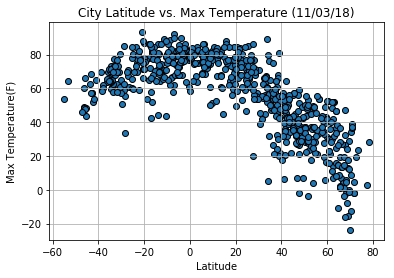

In [21]:
plt.scatter(weather_df["Lat"],weather_df["Temp"],edgecolors="black")
plt.title("City Latitude vs. Max Temperature (11/03/18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")
plt.grid()
plt.savefig("latitude_temp.png")

#### Latitude vs. Humidity Plot

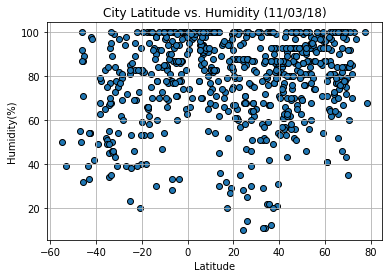

In [22]:
plt.scatter(weather_df["Lat"],weather_df["Humidity"],edgecolors="black")
plt.title("City Latitude vs. Humidity (11/03/18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.grid()
plt.savefig("latitude_humidity.png")

#### Latitude vs. Cloudiness Plot

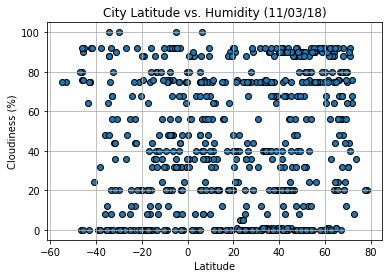

In [23]:
plt.scatter(weather_df["Lat"],weather_df["Cloud"],edgecolors="black")
plt.title("City Latitude vs. Humidity (11/03/18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("latitude_humidity.png")

#### Latitude vs. Wind Speed Plot

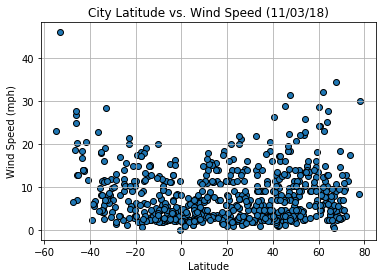

In [24]:
plt.scatter(weather_df["Lat"],weather_df["Wind"],edgecolors="black")
plt.title("City Latitude vs. Wind Speed (11/03/18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("latitude_wind_speed.png")

In [ ]:
#Three Observable trends:
#1). There is no correlation between latitude and humidity.
#2). It appears that as you approach the equator the temperature
#rises and as you move further north or south the temperature starts to drop again.
#3).It also appears that the while wind speed stays consistent for the most part, 
#the higher wind speeds seem to appear farther from the equator.
